In [2]:
%pip install pandas 
%pip install numpy 
%pip install scikit-learn
%pip install matplotlib

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [15]:
#collect and clean data 
df = pd.read_csv('/home/josh/Dev/tyit_sem5/dmdw/dwdm_project/data/stocks/AAPL.csv')
df = df.dropna()

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '2012-04-20'),
  Text(0.0, 0, '1980-12-12'),
  Text(2000.0, 0, '1988-11-10'),
  Text(4000.0, 0, '1996-10-09'),
  Text(6000.0, 0, '2004-09-22'),
  Text(8000.0, 0, '2012-08-29'),
  Text(10000.0, 0, ''),
  Text(12000.0, 0, '')])

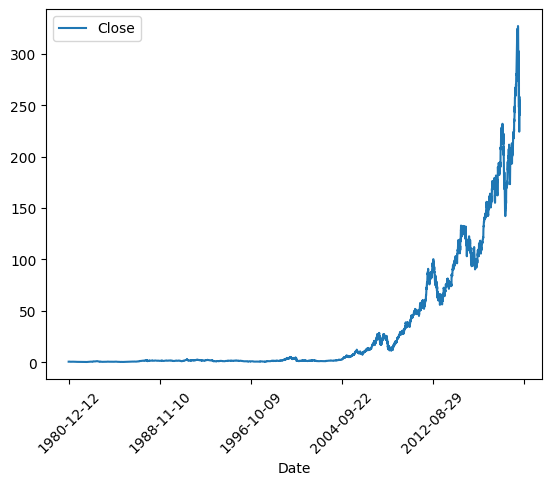

In [16]:
#show the data visually 
df.plot(x="Date", y= "Close")
plt.xticks(rotation = 45)

In [17]:
#create the model 
model = RandomForestRegressor()

In [19]:
#train the model 

x = df[['Open','High','Low','Volume']]
x = x[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(x,y) # to train the model 

RandomForestRegressor()

In [21]:
#test the model 
predictions = model.predict(x)
print('the model score is: ', model.score(x,y))

the model score is:  0.9999845157946995


In [25]:
#make the predictions: 
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print("the model predicts the last row or day to be:", prediction)
print("actual value: " ,df[['Close']].tail(1).values[0][0])


the model predicts the last row or day to be: [246.54889832]
actual value:  240.91000366210935
